Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...

Logistic Regression:
Accuracy: 0.9733333333333334
Precision: 0.9767676767676768
Recall: 0.9733333333333334
Confusion Matrix:


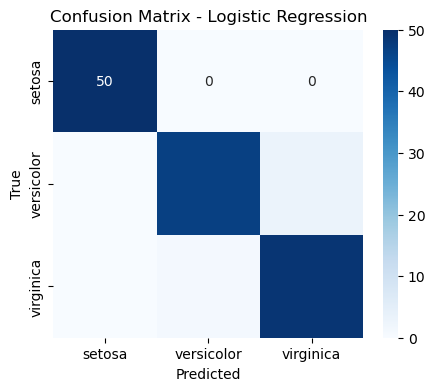

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]

Decision Tree:
Accuracy: 0.9533333333333334
Precision: 0.9622895622895623
Recall: 0.9666666666666668
Confusion Matrix:


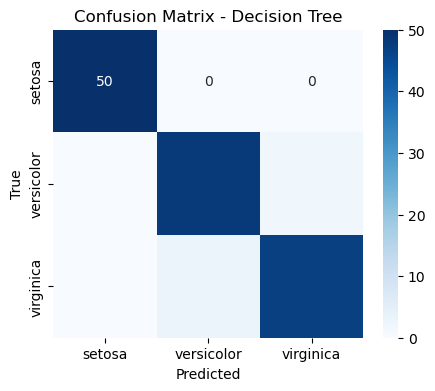

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]

Random Forest:
Accuracy: 0.96
Precision: 0.9707070707070707
Recall: 0.96
Confusion Matrix:


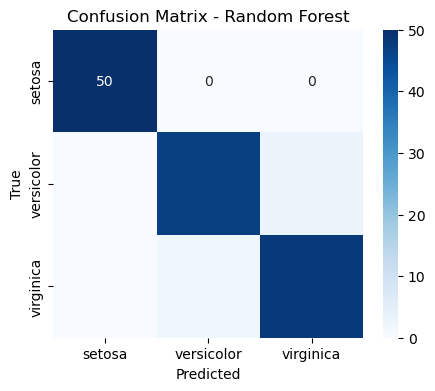

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]

Support Vector Machine:
Accuracy: 0.9666666666666666
Precision: 0.9684848484848484
Recall: 0.9666666666666666
Confusion Matrix:


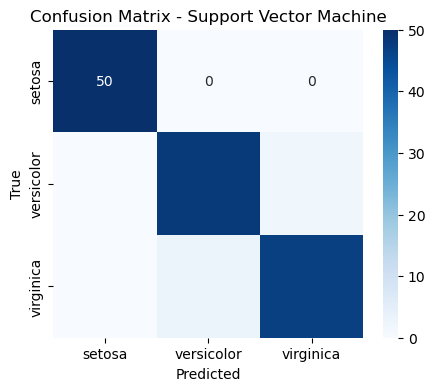

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Entrenar y evaluar los modelos
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    y_pred = cross_val_predict(model, X, y, cv=5)
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(model, X, y, cv=5, scoring='recall_macro').mean()
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": confusion_matrix(y, y_pred)
    }

# Mostrar los resultados
for name, result in results.items():
    print(f"\n{name}:")
    print("Accuracy:", result["Accuracy"])
    print("Precision:", result["Precision"])
    print("Recall:", result["Recall"])
    print("Confusion Matrix:")
    plt.figure(figsize=(5, 4))
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print(confusion_matrix(y, y_pred))


In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=0)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

N_FOLDS = 5 # Número de folds para la validación cruzada

for name, model in models.items():
    y_pred = cross_val_predict(model, X_train, y_train, cv=N_FOLDS)
    
    print(f"{name} Metrics with Cross-Validation:")
    print(f"CV Accuracy: {cross_val_score(model, X_train, y_train, cv=N_FOLDS, scoring='accuracy').mean():.2f}")
    print(f"Precision: {precision_score(y_train, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_train, y_pred, average='weighted'):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_pred))
    print("\n")

Logistic Regression Metrics with Cross-Validation:
CV Accuracy: 0.97
Precision: 0.98
Recall: 0.97
Confusion Matrix:
[[29  0  0]
 [ 0 18  2]
 [ 0  0 26]]


K-Nearest Neighbors Metrics with Cross-Validation:
CV Accuracy: 0.97
Precision: 0.98
Recall: 0.97
Confusion Matrix:
[[29  0  0]
 [ 0 18  2]
 [ 0  0 26]]


Support Vector Machine Metrics with Cross-Validation:
CV Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Confusion Matrix:
[[29  0  0]
 [ 0 19  1]
 [ 0  0 26]]


Decision Tree Metrics with Cross-Validation:
CV Accuracy: 0.93
Precision: 0.93
Recall: 0.93
Confusion Matrix:
[[29  0  0]
 [ 0 18  2]
 [ 0  3 23]]


